# Пример создания сверточных и пуллинг слоев

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D

(8, 9)


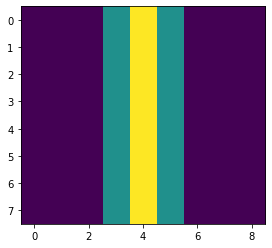

In [2]:
# определение входных данных
data = [[0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0]]

data = np.asarray(data).astype(np.float64)
print(data.shape)
plt.imshow(data)

In [3]:
data = data.reshape(1, 8, 9, 1)

In [4]:
max_pooling = MaxPooling2D(pool_size=(1, 3), strides=(1, 2))
avg_pooling = AveragePooling2D(pool_size=(1, 3), strides=(1, 2))

(1, 8, 4, 1)
[[0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]]


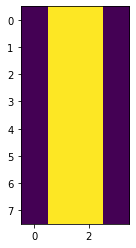

In [5]:
max_pooling_data = max_pooling(data)
print(max_pooling_data.shape)
_, h, w, _ = max_pooling_data.shape
plt.imshow(max_pooling_data.numpy().reshape(h, w))
print(max_pooling_data.numpy().reshape(h, w))

(1, 8, 4, 1)
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


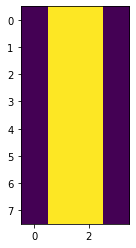

In [6]:
avg_pooling_data = avg_pooling(data)
print(avg_pooling_data.shape)
_, h, w, _ = avg_pooling_data.shape
plt.imshow(avg_pooling_data.numpy().reshape(h, w))
print(avg_pooling_data.numpy().reshape(h, w))

In [7]:
# создание модели
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 9, 1)))

# вывод описания созданной модели
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 7, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers[0].get_weights()[0]

array([[[[-0.51591426]],

        [[-0.13372606]],

        [[ 0.00568813]]],


       [[[ 0.1049903 ]],

        [[-0.5235996 ]],

        [[-0.02046221]]],


       [[[-0.36528617]],

        [[-0.4927553 ]],

        [[ 0.4835825 ]]]], dtype=float32)

In [9]:
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

weights = [np.asarray(detector), np.asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)

In [10]:
yhat = model.predict(data)
yhat.shape

(1, 6, 7, 1)

In [11]:
yhat.reshape(6, 7)

array([[0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.],
       [0., 0., 3., 6., 3., 0., 0.]], dtype=float32)

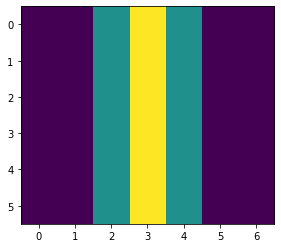

In [12]:
plt.imshow(yhat.reshape(6, 7))

# Нейронная сеть Lenet5

In [13]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow import keras

In [14]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 1s 0us/step


In [15]:
x_train[0].shape

(28, 28, 1)

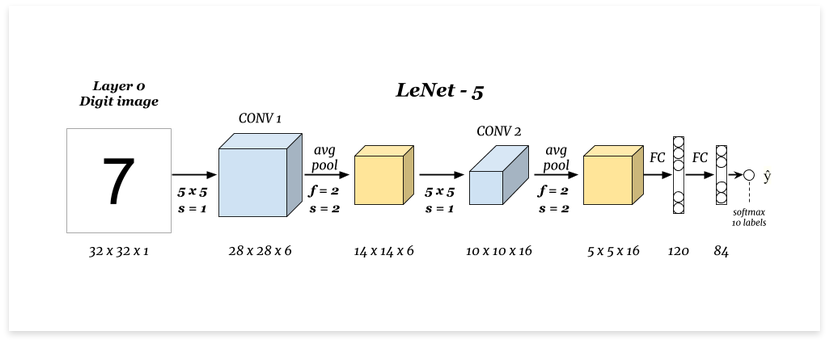

In [16]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# пятый полносвязный слой
model.add(layers.Dense(120, activation='tanh'))

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))

In [17]:
# инициализация пустой модели
model = Sequential()

convolutional = Sequential([
                            layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
                            layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
])

linear = Sequential([
                            layers.Flatten(),
                            layers.Dense(120, activation='tanh'),
                            layers.Dense(84, activation='tanh'),
                            layers.Dense(10, activation='softmax')
])


model.add(convolutional)
model.add(linear)

In [18]:
model.layers[0].layers[0].get_weights()[0].shape

(5, 5, 1, 6)

In [19]:
model.layers[0].layers[1].get_weights()

[]

In [20]:
model.layers[0].layers[2].get_weights()[0].shape

(5, 5, 6, 16)

In [21]:
# компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=x_train,y=y_train, epochs=2, batch_size=128, verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


Epoch 1/2
469/469 [==============================] - 4s 8ms/step - loss: 1.2531 - accuracy: 0.6655
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8928
Test loss 0.4023, accuracy 89.28%


# Более сложная нейронная сеть

In [22]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os

In [23]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [24]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 362s 2us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [25]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

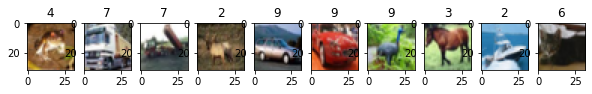

In [26]:
plot_images(x_train[:10], y_train[10:20])

In [27]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [28]:
datagen[0]

TypeError: 'ImageDataGenerator' object is not subscriptable

In [ ]:
dg = datagen.flow(x_train[:5], batch_size=1)

In [ ]:
dg[0]

In [ ]:
plot_images(dg, y_train[:5])

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [ ]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

In [ ]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


In [ ]:

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Если не сильно увеличить кол-во слоёв, можно улучшить качество. Так же помогает увеличение числа итераций.

При изменениях Dropout на сильно большое или сильно маленькое значение качество проседает.


- MNIST:

База данных из 60000 изображений, как и в CIFAR10, только с размером 28х28, а не 32х32.


- CIFAR100:

Количество классов не 10, а 100, сгруппированных в 20 суперклассов


- IMAGENET:

База данных с миллионами изображений, разбитых на пару десятков тысяч категорий.
Тут, вероятно, понадобились бы большие вычислительные мощности.